# EDA

In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection

In [2]:
# this is for the metadata
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

# this is for the vectorized text
# the index is reset in this one... which should be fine 
df_text = pd.read_csv('csv_files/X_train_nlp.csv')

# 'csv_files/y_train_nlp.csv', encoding='utf-8', index=False

In [3]:
# will concat X_train_nlp with X_train
# processing flow, split metadata, reset index to match nlp data, concat, subset bestsellers and not
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['title', 'author', 'format', 'genre', 'pages', 'rating']], 
                                                                    df['best_seller'], 
                                                                    test_size = .2,
                                                                    random_state = 42)

# reset the index to match processed df_text
len(X_train)
type(X_train)
X_train.reset_index(drop = True)
y_train.reset_index(drop = True)

0       0
1       0
2       1
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1068    0
1069    0
1070    0
1071    0
1072    0
1073    1
1074    0
1075    1
1076    0
1077    0
1078    1
1079    0
1080    0
1081    0
1082    0
1083    1
1084    0
1085    0
1086    1
1087    0
1088    0
1089    1
1090    0
1091    0
1092    0
1093    1
1094    1
1095    1
1096    0
1097    1
Name: best_seller, Length: 1098, dtype: int64

# metadata
- y_train is bestseller ~bestseller
- X_train is book meta data
- df_text is just text data

## concat meatadata and text dataframes

In [4]:
print('number of best sellers in training set', y_train.sum())
print('number of total books in training set', len(y_train))

number of best sellers in training set 227
number of total books in training set 1098


In [5]:
df.columns

Index(['author', 'description', 'format', 'genre', 'month', 'pages',
       'publisher', 'rating', 'title', 'year', 'best_seller'],
      dtype='object')

In [6]:
X_train['bestseller'] = y_train

In [7]:
# rename meta columns to not affect text dataframe
X_train.rename(columns={'genre':'book_genre', 'author':'meta_author', 
                        'title':'meta_title', 'format':'meta_format',
                        'pages':'meta_pages', 'rating':'meta_rating'},
                        inplace = True)
# X_train['book_genre'] = 

In [8]:
df = X_train.reset_index(drop = True)

In [9]:
df = pd.concat([df, df_text], axis =1)

In [10]:
df.shape

(1098, 5849)

## rating analysis

In [11]:
# check that every book is rated
df.meta_rating.isnull().sum()

0

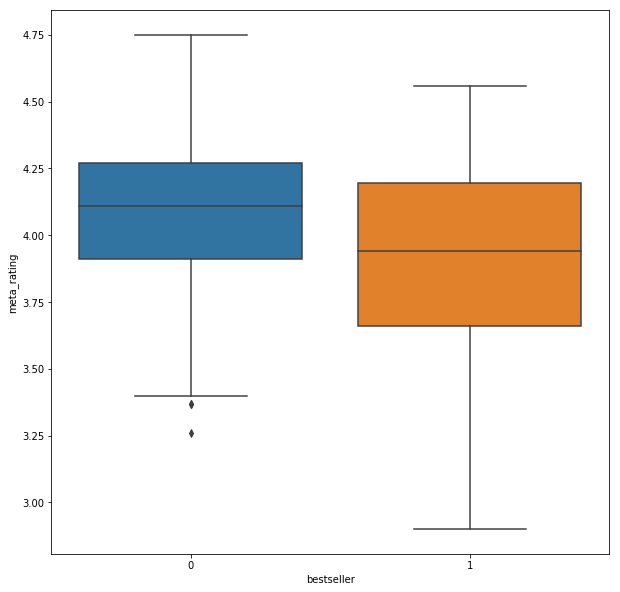

In [12]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=df["bestseller"], y=df['meta_rating'])#, 
#                     data=df, palette="Set3")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1188fba8>,
      dtype=object)

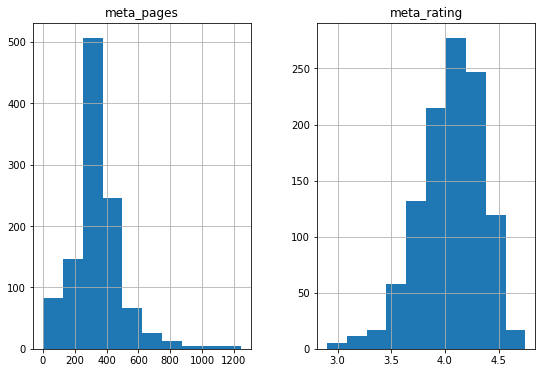

In [13]:
df.hist(column=['meta_pages', 'meta_rating'], figsize=(9,6))

## genre analysis

In [14]:
# need to look at book_genre more
df['book_genre'].unique()
# df['book_genre'].isnull().sum()

array(['Autobiography', 'Sequential Art', 'Economics', 'Fantasy',
       'Historical', 'Fiction', 'Nonfiction', 'Horror', 'Young Adult',
       'Poetry', 'Science', 'Short Stories', 'New Adult', 'Classics',
       'Contemporary', 'Science Fiction', 'Childrens', 'Food and Drink',
       'Humor', 'Thriller', 'Polyamorous', 'History', 'Romance',
       'Mystery', 'Media Tie In', 'Literature', 'Biography', 'Politics',
       'Paranormal', 'Writing', 'Dark', 'Business', 'Religion',
       'Philosophy', 'Christian', 'Sports and Games'], dtype=object)

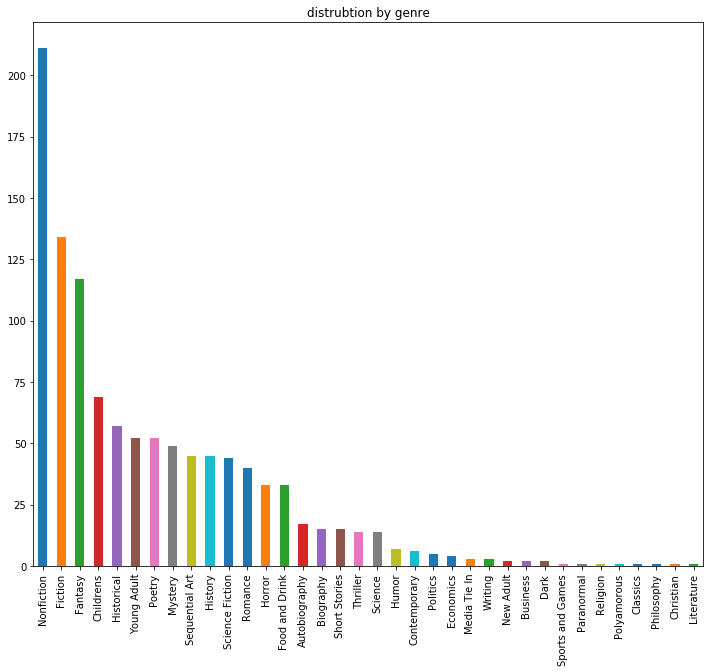

In [15]:
# distrubtion by genre of all books
df['book_genre'].value_counts().plot(kind='bar', title='distrubtion by genre', figsize=(12,10))


In [16]:
# subset the dataframe into best sellers and not
books = df.loc[df['bestseller'] == 0]
best_books = df.loc[df['bestseller'] == 1]

In [17]:
# this is just the distribution in the training data of bestsellers and not
# non-bestsellers
print(books.shape)
# bestsellers
print(best_books.shape)

(871, 5849)
(227, 5849)


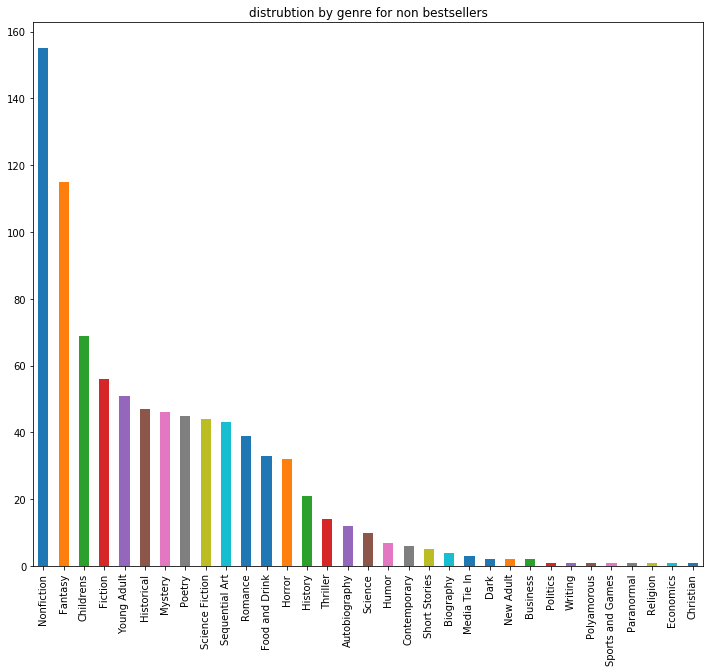

In [18]:
books['book_genre'].value_counts().plot(kind='bar', 
                                        title='distrubtion by genre for non bestsellers', figsize=(12,10))


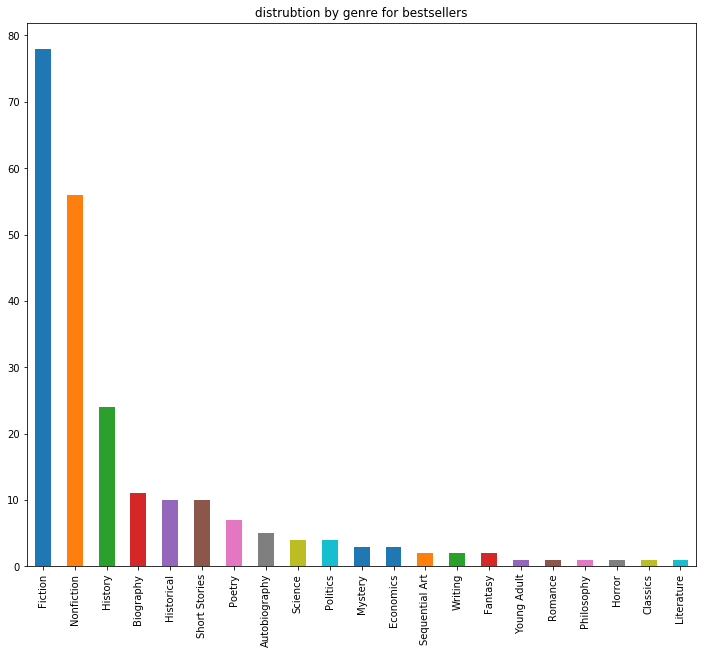

In [19]:
best_books['book_genre'].value_counts().plot(kind='bar', 
                                            title='distrubtion by genre for bestsellers', figsize=(12,10))


In [20]:
print(' NYT bestselling genres',best_books['book_genre'].unique(), '\n \n', 
      'Non-bestselling genres', books['book_genre'].unique())

 NYT bestselling genres ['Economics' 'Fiction' 'Short Stories' 'Classics' 'Nonfiction' 'Science'
 'Autobiography' 'Sequential Art' 'Poetry' 'Literature' 'Biography'
 'Historical' 'History' 'Politics' 'Writing' 'Fantasy' 'Romance' 'Mystery'
 'Young Adult' 'Philosophy' 'Horror'] 
 
 Non-bestselling genres ['Autobiography' 'Sequential Art' 'Fantasy' 'Historical' 'Nonfiction'
 'Fiction' 'Horror' 'Young Adult' 'Poetry' 'Science' 'New Adult'
 'Contemporary' 'Science Fiction' 'Childrens' 'Food and Drink' 'Humor'
 'Thriller' 'Polyamorous' 'History' 'Romance' 'Mystery' 'Media Tie In'
 'Biography' 'Politics' 'Paranormal' 'Short Stories' 'Dark' 'Business'
 'Religion' 'Economics' 'Christian' 'Sports and Games' 'Writing']


In [21]:
print(" Genres that don't appear on the NYT bestseller list \n", 
      [x for x in books['book_genre'].unique() if not x in best_books['book_genre'].unique()])



 Genres that don't appear on the NYT bestseller list 
 ['New Adult', 'Contemporary', 'Science Fiction', 'Childrens', 'Food and Drink', 'Humor', 'Thriller', 'Polyamorous', 'Media Tie In', 'Paranormal', 'Dark', 'Business', 'Religion', 'Christian', 'Sports and Games']


These genres might be to predictive during modeling
- consider dropping books with those genres
- consolidating genres to 'top hits'

## author analysis

In [22]:
df.columns
df.meta_author.shape

(1098,)

In [23]:
print('There are', df.meta_author.unique().shape[0], 'unique authors of', df.meta_author.shape[0], 'books')

There are 955 unique authors of 1098 books


In [24]:
df.meta_author.value_counts() 

Sarah J. Maas            6
Stephen King             6
Brandon Sanderson        5
Brian K. Vaughan         5
Rick Riordan             4
Grady Hendrix            3
Mark  Lawrence           3
Yoon Ha Lee              3
Michael J. Sullivan      3
Tahereh Mafi             3
Charles Stross           3
Chris Colfer             3
Kasie West               3
B.A. Paris               3
Penny Reid               3
Seanan McGuire           3
Sarah Andersen           3
Dot Hutchison            3
Marjorie M. Liu          3
Victoria Aveyard         3
Brandon Mull             3
Marissa Meyer            2
Tui T. Sutherland        2
Veronica Roth            2
Michael   Lewis          2
Jesmyn Ward              2
Leigh Bardugo            2
Philippa Gregory         2
Roxane Gay               2
Anne Bishop              2
                        ..
Kimberly Belle           1
Jessie Sima              1
Jenny Erpenbeck          1
Catherynne M. Valente    1
Robert Kurson            1
Tasty                    1
J

No surprise Stephen King is the most prolific author in the dataset

# TODO
- Add text feature EDA
